In [4]:
import scipy.io as sio

d2 = sio.loadmat("d2.mat")
atmo_data = d2["atmoSensors_data"]
len(atmo_data)

11856

In [14]:
temp_2m = []
temp_30m = []
temp_56m = []
x = range(0, len(atmo_data))

for i in atmo_data:
    temp_2m.append(i[6])
    temp_30m.append(i[7])
    temp_56m.append(i[8])

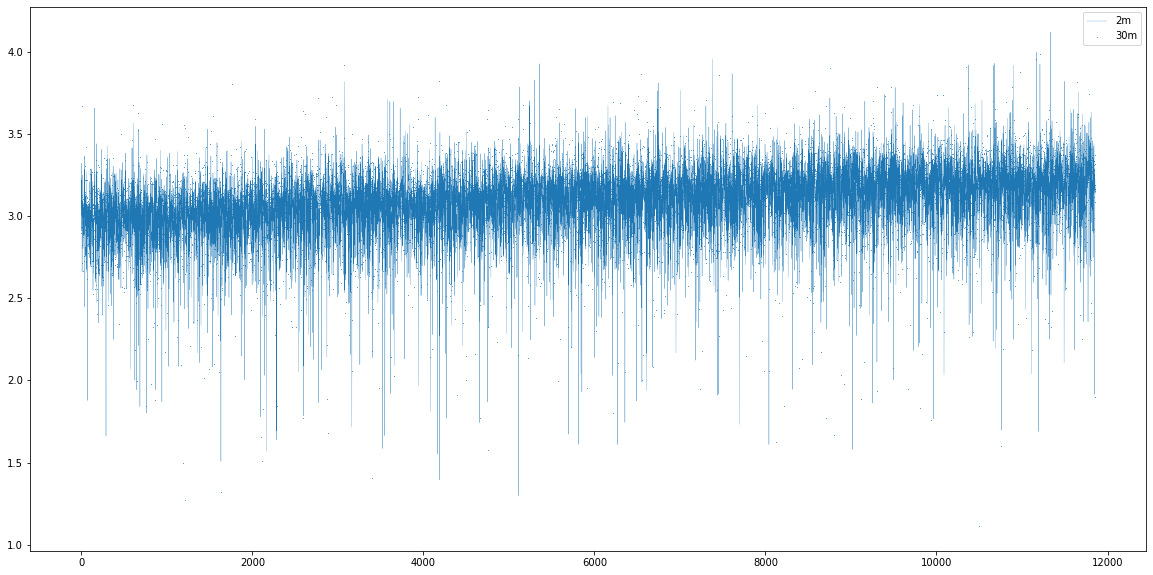

In [24]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 10))
# plt.scatter(x, temp_2m, s=0.5, label="2m", linewidth=0.25)
plt.plot(x, temp_2m, label="2m", linewidth=0.25)
plt.scatter(x, temp_30m, s=0.5, label="30m", linewidth=0.25)
# plt.scatter(x, temp_56m, s=0.25, label="56m", linewidth=0.25)
plt.legend()
plt.show()

In [25]:
import numpy as np
from scipy.signal import butter, lfilter, freqz


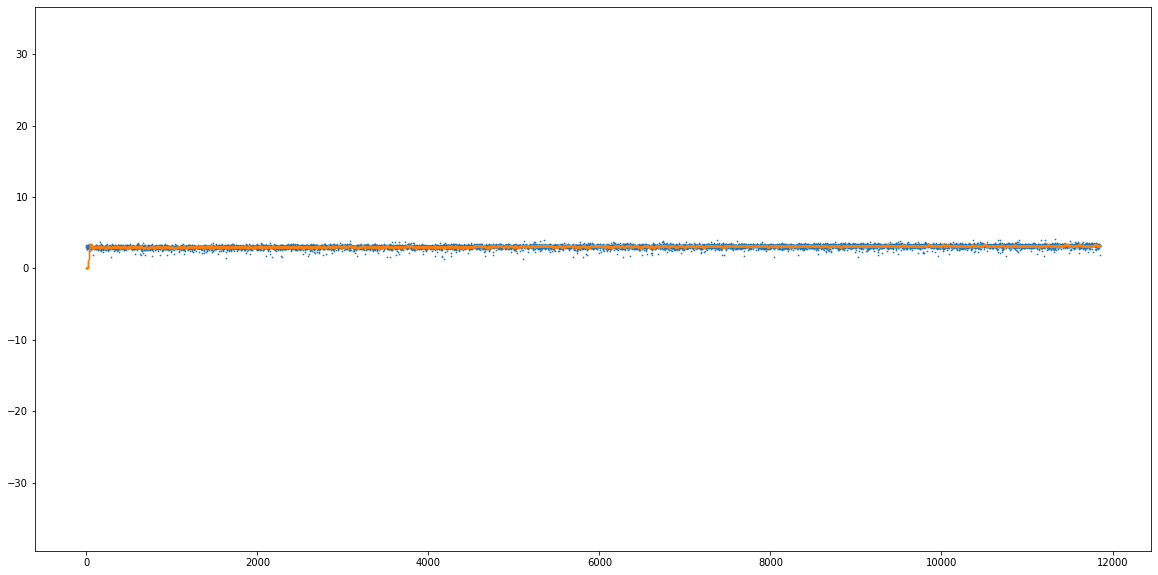

In [72]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 / fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
hz = 20
fs = 0.001

ymin = np.amin(temp_56m)
ymax = np.amax(temp_56m)
ylim = (ymin, ymax)

lp_data = butter_lowpass_filter(temp_2m, fs, hz, order=5)
figure(figsize=(20, 10))
plt.scatter(x, temp_2m, s=0.5)
plt.scatter(x, lp_data, s=0.5)
plt.ylim(ylim)
plt.show()


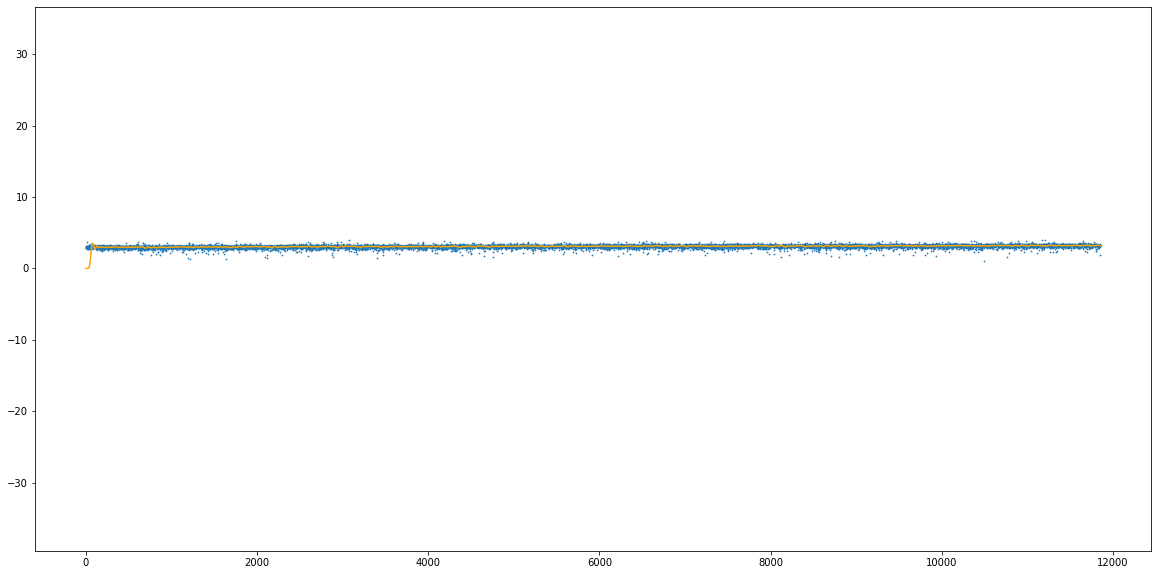

In [73]:
lp_data = butter_lowpass_filter(temp_30m, fs, hz, order=10)
figure(figsize=(20, 10))
plt.scatter(x, temp_30m, s=0.5)
plt.plot(lp_data, color="orange")
plt.ylim(ylim)
plt.show()

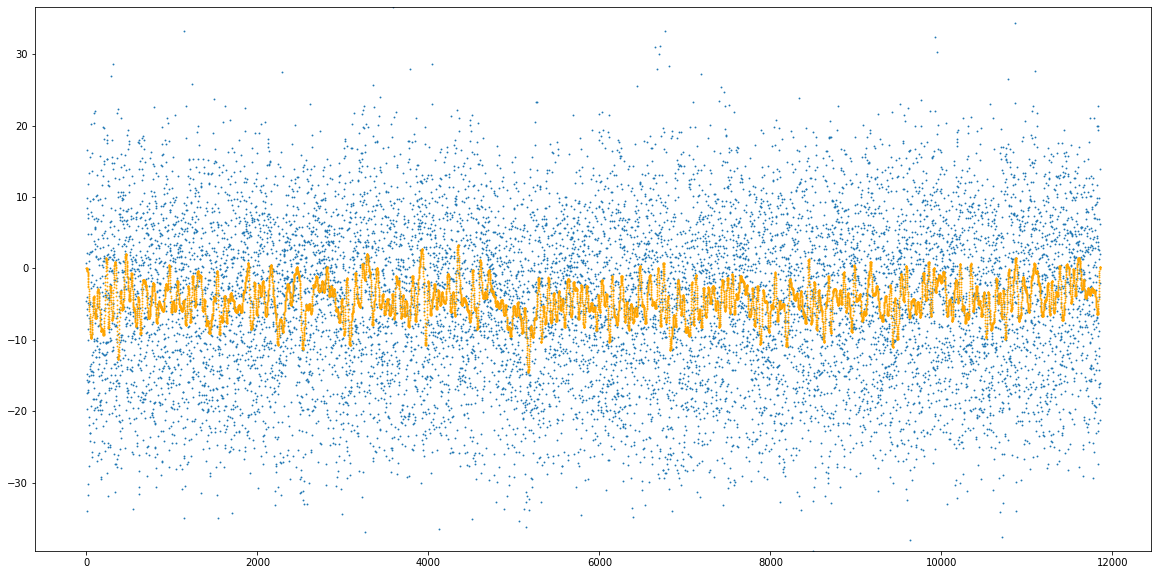

In [74]:
lp_data = butter_lowpass_filter(temp_56m, fs, hz, order=5)
figure(figsize=(20, 10))
plt.scatter(x, temp_56m, s=0.75)
plt.scatter(x, lp_data, s=0.75, color="orange")
plt.ylim(ylim)
plt.show()

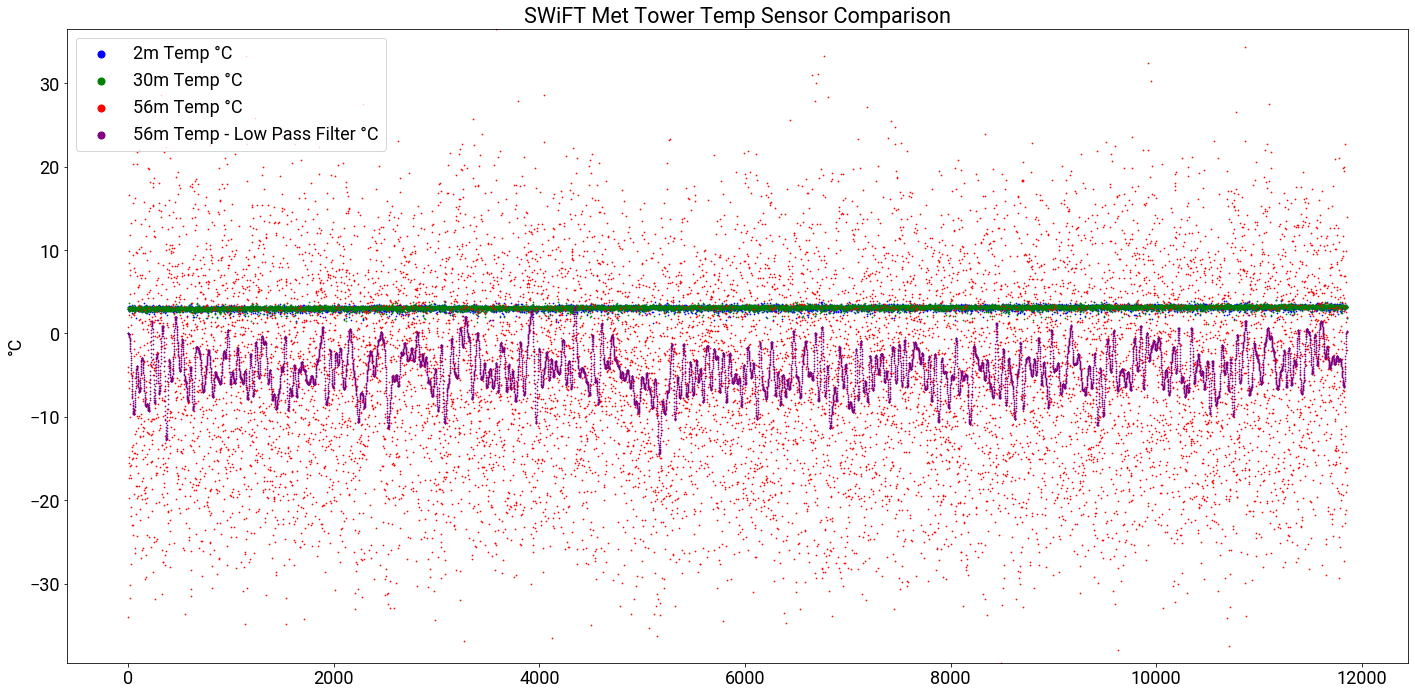

In [110]:
from matplotlib import rc
rc('text', usetex=False)
rc('font',**{'family':'sans-serif','sans-serif':['Roboto']})
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

rc('font', **font)

figure(figsize=(20, 10))

ymin = np.amin(temp_56m)
ymax = np.amax(temp_56m)
ylim = (ymin, ymax)

unit = "°C"

# 2m
lp_data_2m = butter_lowpass_filter(temp_2m, fs, hz)
plt.scatter(x, temp_2m, s=0.5, color="blue", label="2m Temp {}".format(unit))
#plt.scatter(x, lp_data_2m, s=0.5, color="blue")

# 30m
lp_data_30m = butter_lowpass_filter(temp_30m, fs, hz)
plt.scatter(x, temp_30m, s=0.5, color="green", label="30m Temp {}".format(unit))
#plt.plot(lp_data_30m, color="orange")

# 56m
lp_data_56m = butter_lowpass_filter(temp_56m, fs, hz)
plt.scatter(x, temp_56m, s=0.5, color="red", label="56m Temp {}".format(unit))
plt.scatter(x, lp_data_56m, s=0.5, color="purple", label="56m Temp - Low Pass Filter {}".format(unit))

plt.title("SWiFT Met Tower Temp Sensor Comparison")
plt.ylabel(unit)

plt.ylim(ylim)
legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_sizes([50.0])
    
plt.tight_layout()
plt.show()